<a href="https://colab.research.google.com/github/yehorkalchenko81/goit-ds-hw-05/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України')[0]

In [67]:
table.replace('—', np.nan, inplace=True)

In [68]:
x = table['Регіон']
table.fillna(0, inplace=True)
table = table[1:].astype('float64', errors='ignore')
table['Регіон'] = x

float_columns = table.select_dtypes(['float64', 'int64']).columns
table[float_columns] = table[float_columns] / 10

             Регіон  1950  1960  1970  1990  2000  2012 2014 2019
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  109   76
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  141  101
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  111   71
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   82    0
5       Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  120   79


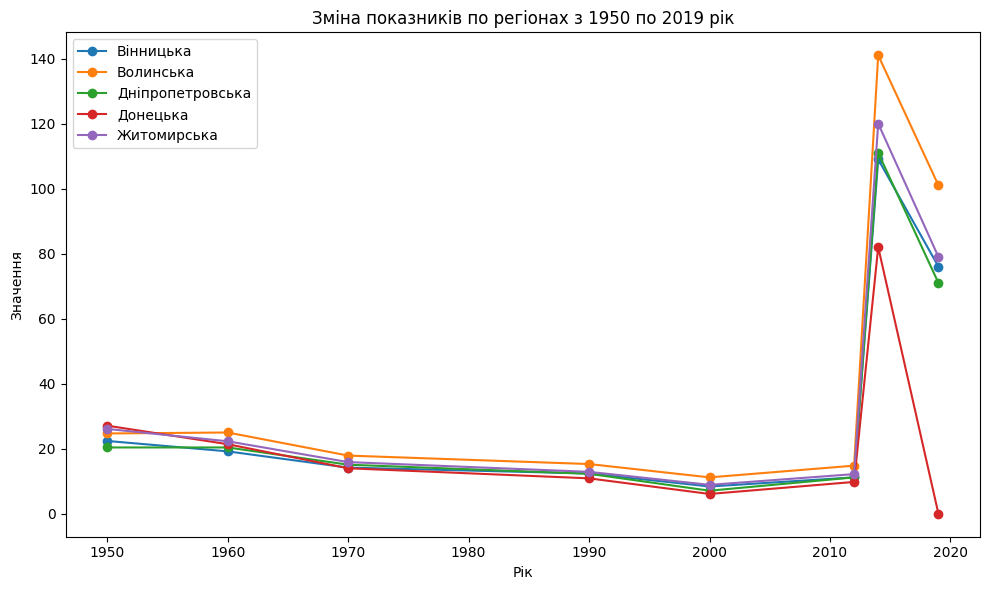

In [69]:
print(table.head())

table_melted = table[:5].melt(id_vars=["Регіон"], var_name="Рік", value_name="Значення")
table_melted["Рік"] = table_melted["Рік"].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))

for region in table[:5]['Регіон']:
    region_data = table_melted[table_melted["Регіон"] == region]
    ax.plot(region_data["Рік"], region_data["Значення"], marker='o', label=region)

ax.set_xlabel('Рік')
ax.set_ylabel('Значення')
ax.set_title('Зміна показників по регіонах з 1950 по 2019 рік')

ax.legend()

plt.tight_layout()
plt.show()

In [70]:
print(table.shape)

(27, 9)


In [71]:
table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [72]:
table.isnull().sum()

Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64

In [73]:
table.drop(27, axis=0)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,109,76
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,141,101
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,111,71
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,82,0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,120,79
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,146,104
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,106,68
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,122,88
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,121,80
10,Кіровоградська,21.6,17.1,14.5,12.6,7.9,11.0,108,68


In [74]:
table.replace(0, table.mean(numeric_only=True).astype('float64', errors='ignore'), inplace=True)
table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
1,Вінницька,22.400000,19.200000,14.200000,12.4,8.4,11.2,109,76
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,141,101
3,Дніпропетровська,20.400000,20.400000,15.100000,12.3,7.1,11.2,111,71
4,Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,82,0
5,Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,120,79
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,146,104
7,Запорізька,21.900000,19.700000,15.000000,12.4,7.1,10.6,106,68
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,122,88
9,Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,121,80
10,Кіровоградська,21.600000,17.100000,14.500000,12.6,7.9,11.0,108,68


In [75]:
ab_2019_regions = table[table['2019'] > int(table.loc[27, '2019'])]
ab_2019_regions['Регіон']

TypeError: '>' not supported between instances of 'str' and 'int'